# Direct Tail-Risk Insurance strategies
Compare the most important indexes that track the performance of tail risk strategies applied to the S&P 500 index

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import math
sns.set()

from functions_thesis import *

In [2]:
# Import data
strategies = pd.read_excel("Data_tesi.xlsx", sheet_name="Monthly against tail risk", index_col="Dates")

strategies_daily = pd.read_excel("Data_tesi.xlsx", sheet_name="Daily against tail risk", index_col="Dates")

sp = pd.read_excel("Data_tesi.xlsx", sheet_name="SPY ETF monthly", index_col="Dates")

vxth = pd.read_excel("Data_tesi.xlsx", sheet_name="Daily against tail risk", index_col="Dates")
vxth = vxth["VXTH"]

## Indexes description

- PPUT = Combination of SP500 and 5% OTM Put Options
- CLL = Collar strategy, 5% OTM Puts costs partially compensated by selling 10% OTM calls
- CLLZ = Collar strategy where Puts bought are entirely financend by selling OTM Calls
- VXTH = Combination of SP500 and OTM call options on the VIX index, with weights based on the VIX futures levels.
- SPVQDTR = VEQTOR index that allocates to SP500, VIX futures or cash, with weights based on two monthly volatility signals (relaized volatility and implied volatility trend)
- LOVOL = combination of VXTH and BXM (CBOE BuyWrite index)

In [3]:
strat = strategies[["SPXT", "PPUT", "CLL", "CLLZ", "VXTH", "SPVQDTR", "LOVOL"]]
strat = strat.dropna()
strat_ret = np.log(1+strat.pct_change()).dropna()

strat_daily = strategies_daily[["SPXT", "PPUT", "CLL", "CLLZ", "VXTH", "SPVQDTR", "LOVOL"]]
strat_daily = strat_daily.dropna()
strat_daily_ret = np.log(1+strat_daily.pct_change()).dropna()

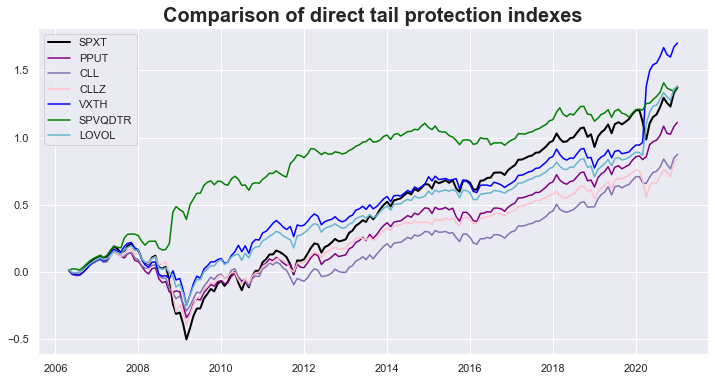

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(strat_ret["SPXT"].cumsum(), "black", linewidth=2)
plt.plot(strat_ret["PPUT"].cumsum(), "purple")
plt.plot(strat_ret["CLL"].cumsum(), "m")
plt.plot(strat_ret["CLLZ"].cumsum(), "pink")
plt.plot(strat_ret["VXTH"].cumsum(), "blue")
plt.plot(strat_ret["SPVQDTR"].cumsum(), "green")
plt.plot(strat_ret["LOVOL"].cumsum(), "c")
plt.legend(strat_ret.columns)
plt.title("Comparison of direct tail protection indexes", fontsize=20, fontweight="bold");

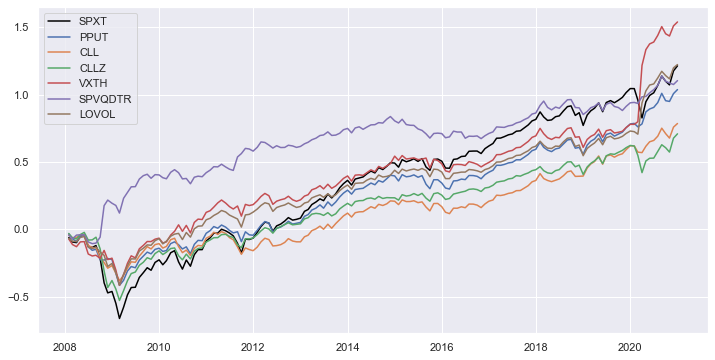

In [5]:
# Different shorter time periods 
# FROM 2008
plt.figure(figsize=(12, 6))
plt.plot(strat_ret["SPXT"].loc["2008-01-31":].cumsum(), "black")
plt.plot(strat_ret[["PPUT", "CLL", "CLLZ", "VXTH", "SPVQDTR", "LOVOL"]].loc["2008-01-31":].cumsum())
plt.legend(strat_ret.columns);

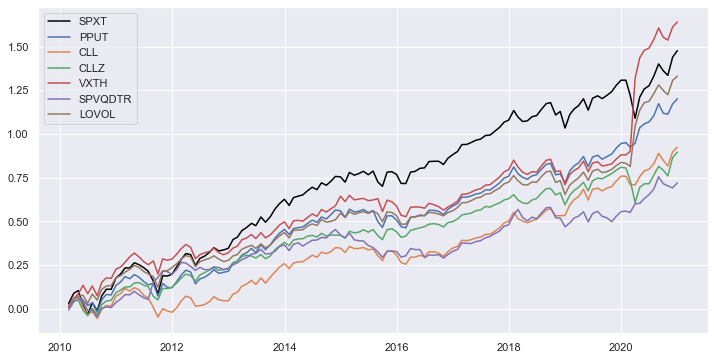

In [6]:
# FROM 2010
plt.figure(figsize=(12, 6))
plt.plot(strat_ret["SPXT"].loc["2010-01-31":].cumsum(), "black")
plt.plot(strat_ret[["PPUT", "CLL", "CLLZ", "VXTH", "SPVQDTR", "LOVOL"]].loc["2010-01-31":].cumsum())
plt.legend(strat_ret.columns);

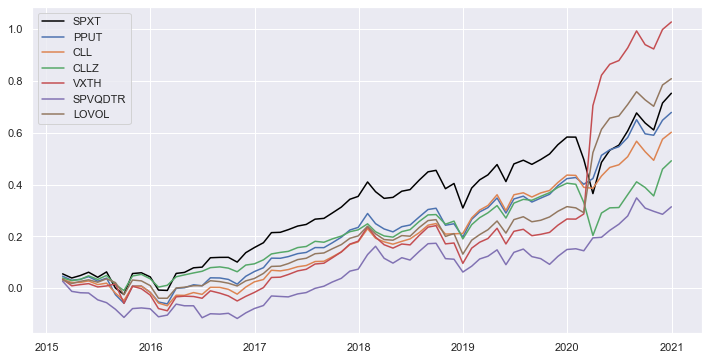

In [7]:
# FROM 2015
plt.figure(figsize=(12, 6))
plt.plot(strat_ret["SPXT"].loc["2015-01-31":].cumsum(), "black")
plt.plot(strat_ret[["PPUT", "CLL", "CLLZ", "VXTH", "SPVQDTR", "LOVOL"]].loc["2015-01-31":].cumsum())
plt.legend(strat_ret.columns);

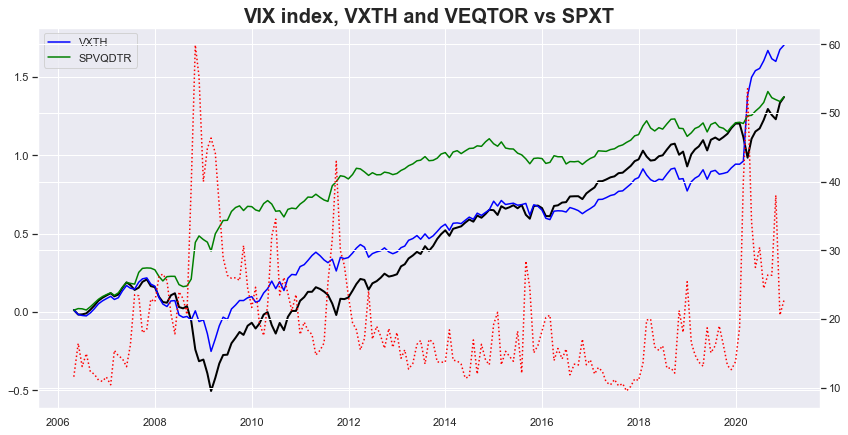

In [8]:
#VIX index levels comparison (VIX CALLS used by VXTH)
#VXX index that tracks futures on VIX is only available from 2018 
vix_index = strategies["VIX"]
vix_index = vix_index.dropna()
vix_index_ret = np.log(1+vix_index.pct_change()).dropna()

fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.plot(strat_ret["SPXT"].cumsum(), "black", linewidth=2)
ax1.plot(strat_ret["VXTH"].cumsum(), "blue", label="VXTH")
ax1.plot(strat_ret["SPVQDTR"].cumsum(), "green", label="SPVQDTR")
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(vix_index[195:], "red", linestyle=":")
plt.title("VIX index, VXTH and VEQTOR vs SPXT", fontsize=20, fontweight="bold");

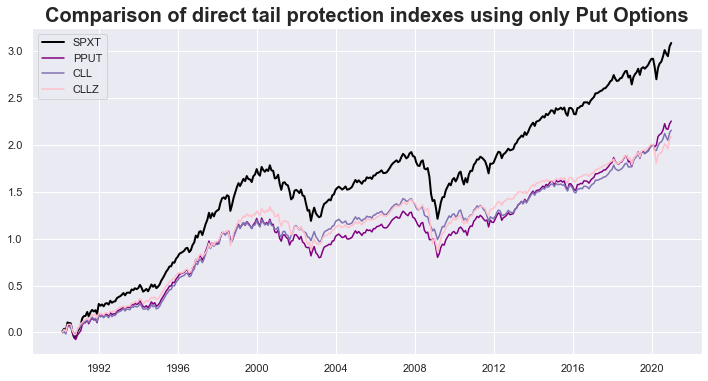

In [9]:
# Only strategies with PUTS 
st = strategies[["SPXT", "PPUT", "CLL", "CLLZ"]]
st = st.dropna()
st_ret = np.log(1+st.pct_change()).dropna()

plt.figure(figsize=(12, 6))
plt.plot(st_ret["SPXT"].cumsum(), "black", linewidth=2)
plt.plot(st_ret["PPUT"].cumsum(), "purple")
plt.plot(st_ret["CLL"].cumsum(), "m")
plt.plot(st_ret["CLLZ"].cumsum(), "pink")
plt.legend(st_ret.columns)
plt.title("Comparison of direct tail protection indexes using only Put Options", fontsize=20, fontweight="bold");

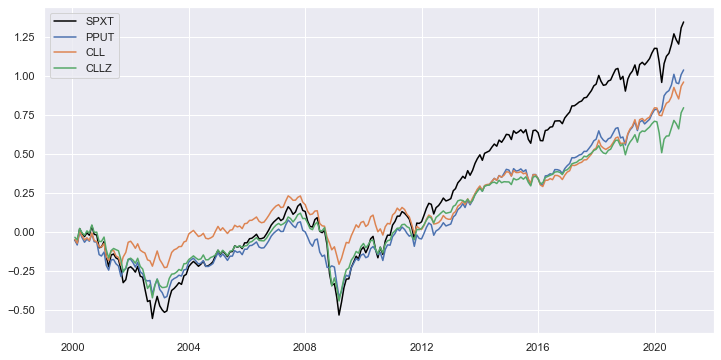

In [10]:
# Different shorter time periods 
# FROM 2000
plt.figure(figsize=(12, 6))
plt.plot(st_ret["SPXT"].loc["2000-01-31":].cumsum(), "black")
plt.plot(st_ret[["PPUT", "CLL", "CLLZ"]].loc["2000-01-31":].cumsum())
plt.legend(st_ret.columns);

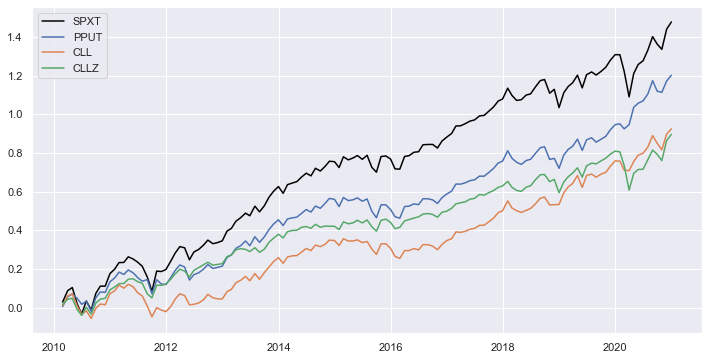

In [11]:
# FROM 2010
plt.figure(figsize=(12, 6))
plt.plot(st_ret["SPXT"].loc["2010-01-31":].cumsum(), "black")
plt.plot(st_ret[["PPUT", "CLL", "CLLZ"]].loc["2010-01-31":].cumsum())
plt.legend(st_ret.columns);

### Traditional evaluation metrics
- Average return √
- CAGR √
- Sharpe ratio √
- Volatility √
- Information ratio √
- Sortino ratio √
- Jensen alpha
- Max annual Drawdown √
- Historical VaR and CVaR √

In [12]:
tr1 = traditional_metrics(strat_ret, strat)

/Users/AlessioGiust/Desktop/TESI/Codici Tesi/functions_thesis.py:26: RuntimeWarning: invalid value encountered in double_scalars
  IR.append((avg_ret_data[tick] - avg_ret_data[index_tick])/(qq["diff_sp_{}".format(tick)].std()))


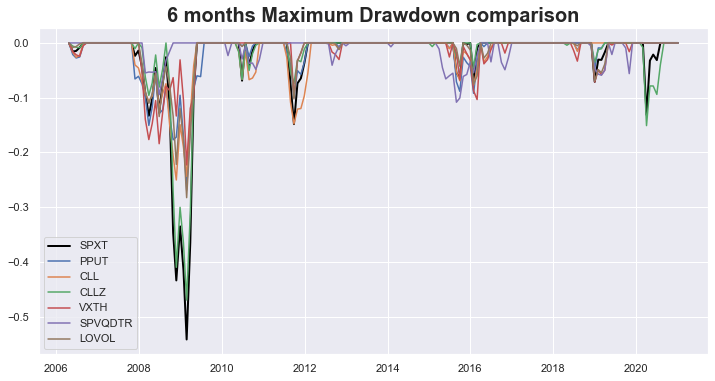

In [13]:
# Drawdown plots
DRAWDOWN = drawdown(strat_ret)

plt.figure(figsize=(12, 6))
plt.plot(DRAWDOWN["SPXT"], "black", linewidth=2)
plt.plot(DRAWDOWN[["PPUT", "CLL", "CLLZ", "VXTH", "SPVQDTR", "LOVOL"]])
plt.legend(strat_ret.columns)
plt.title("6 months Maximum Drawdown comparison", fontsize=20, fontweight="bold");

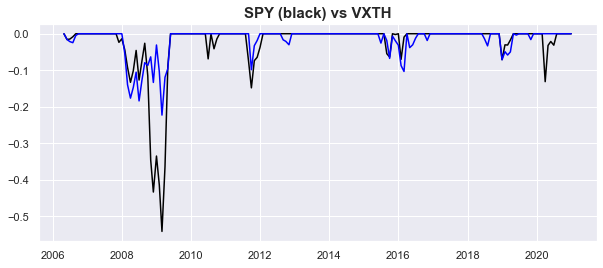

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(DRAWDOWN["SPXT"], "black")
plt.plot(DRAWDOWN["VXTH"], "blue")
plt.title("SPY (black) vs VXTH", fontsize=15, fontweight="bold");

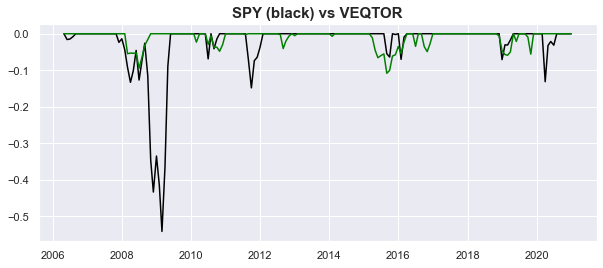

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(DRAWDOWN["SPXT"], "black")
plt.plot(DRAWDOWN["SPVQDTR"], "green")
plt.title("SPY (black) vs VEQTOR", fontsize=15, fontweight="bold");

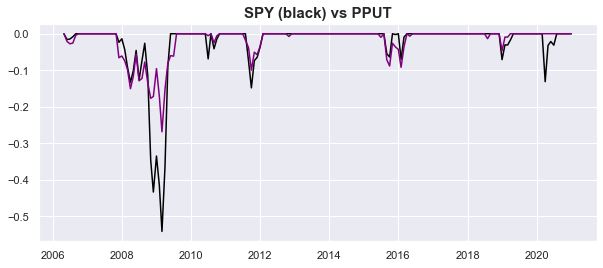

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(DRAWDOWN["SPXT"], "black")
plt.plot(DRAWDOWN["PPUT"], "purple")
plt.title("SPY (black) vs PPUT", fontsize=15, fontweight="bold");

### Tail Risk evaluation metrics
- Performance drag = how much the strategy reduces the S&P 500 returns overall and in the periods when the S&P has positive returns (Bull drag)
- Certainty = how many times the strategy has positive returns given that the S&P 500 has negative returns below a tail threshold
- Average tail return = returns of the strategy given that S&P 500 has negative returns below a tail threshold

In [17]:
#performance_drag(strat_ret, ["PPUT", "CLL", "CLLZ", "VXTH", "SPVQDTR", "LOVOL"], "SPY")
#bull_drag(strat_ret, ["PPUT", "CLL", "CLLZ", "VXTH", "SPVQDTR", "LOVOL"], "SPY", 0.0)
#certainty(strat_ret, ["PPUT", "CLL", "CLLZ", "VXTH", "SPVQDTR", "LOVOL"], "SPY", -0.05)
#avg_tail_return(strat_ret, ["PPUT", "CLL", "CLLZ", "VXTH", "SPVQDTR", "LOVOL"], "SPY", -0.10)
spec1 =specific_metrics(strat_ret, 0.0, -0.05, -0.1)

## Comments

Strategies that uses PUT OPTIONS seems not very useful in protecting against tail risk, because they provide very weak payoffs when there are big drops in the S&P and they reduce signifcantly the returns in bull markets. The PPUT strategy was useful in the 2020 crisis.

Strategies that uses DERIVATIVES on the VIX seems more useful:
 - VXTH (and LOVOL, which is based on VXTH) provided better tail risk protection during the 2008 crisis (even if there were still negative index returns). It also provided exceptional positive returns during the 2020 covid panic in march.
 - VEQTOR provided great protection in 2008, with great positive returns, and it also had a good performance in 2020.

The better choice hence seems to be a combination of the VXTH and the VEQTOR, because VXTH can be more reactive to big volatility spikes that might happen during panic periods, with VEQTOR providing more protection when there a re more broad economic downturns.

Obviously these results can be very prone to overfitting problems because the time period to test the data is relatively short and it includes only two major economic shocks (and it is not possible to artificially test the results in previous time periods because the derivatives used in these strategies were not traded before 2004 and 2006)

It might be possible to price them with options and futures pricing theory but as we know actual and theorical prices are often different for these instruments.

# Controlled Volatility strategies
- SP5LVIT = S&P 500 Low Volatility index. It measures the performance of the 100 least volatile stocks in the S&P 500. 
- SPXT15UT = S&P 500 total return Index with a risk control target of 15%.
- SPLV15UT = S&P 500 Low Volatility index with Daily Risk Control target of 15%.

In [18]:
controlvol = strategies[["SPXT", "SP5LVIT", "SPXT15UT", "SPLV15UT"]] 
controlvol = controlvol.dropna()
controlvol_ret = np.log(1+controlvol.pct_change()).dropna()
controlvol_ret = controlvol_ret[86:]
covo = controlvol[86:]

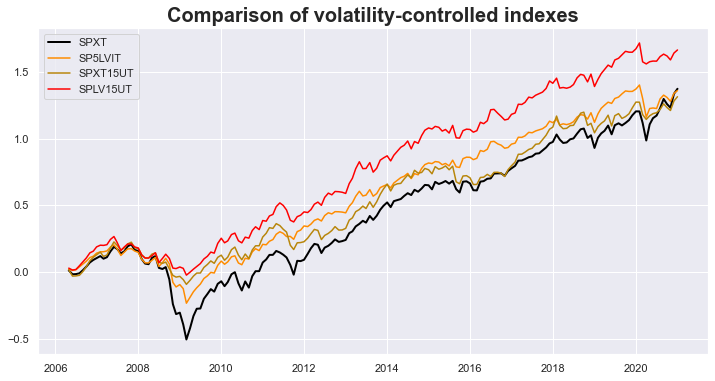

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(controlvol_ret["SPXT"].cumsum(), "black", linewidth=2)
plt.plot(controlvol_ret["SP5LVIT"].cumsum(), "darkorange")
plt.plot(controlvol_ret["SPXT15UT"].cumsum(), "darkgoldenrod")
plt.plot(controlvol_ret["SPLV15UT"].cumsum(), "red")
plt.legend(controlvol_ret.columns)
plt.title("Comparison of volatility-controlled indexes", fontsize=20, fontweight="bold");

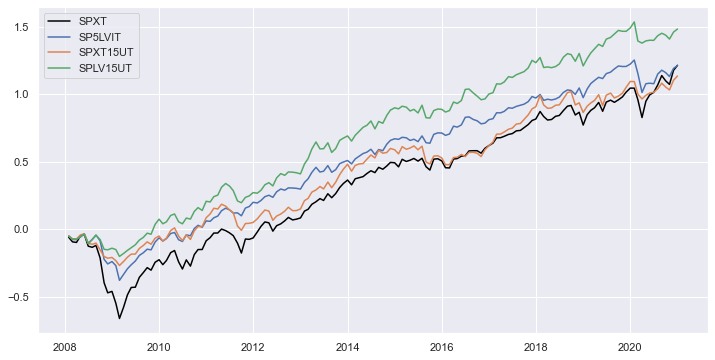

In [20]:
# Different shorter time periods 
# FROM 2008
plt.figure(figsize=(12, 6))
plt.plot(controlvol_ret["SPXT"].loc["2008-01-31":].cumsum(), "black")
plt.plot(controlvol_ret[["SP5LVIT", "SPXT15UT", "SPLV15UT"]].loc["2008-01-31":].cumsum())
plt.legend(controlvol_ret.columns);

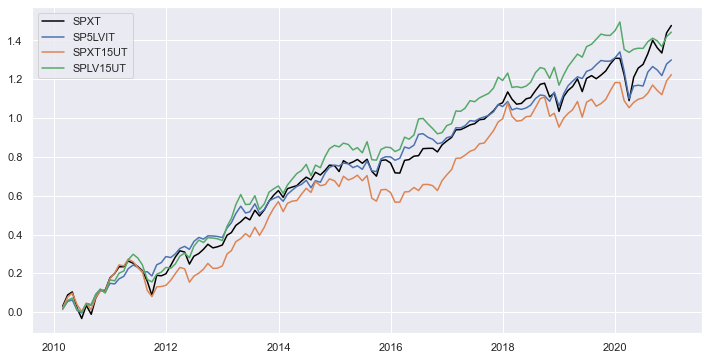

In [21]:
# FROM 2010
plt.figure(figsize=(12, 6))
plt.plot(controlvol_ret["SPXT"].loc["2010-01-31":].cumsum(), "black")
plt.plot(controlvol_ret[["SP5LVIT", "SPXT15UT", "SPLV15UT"]].loc["2010-01-31":].cumsum())
plt.legend(controlvol_ret.columns);

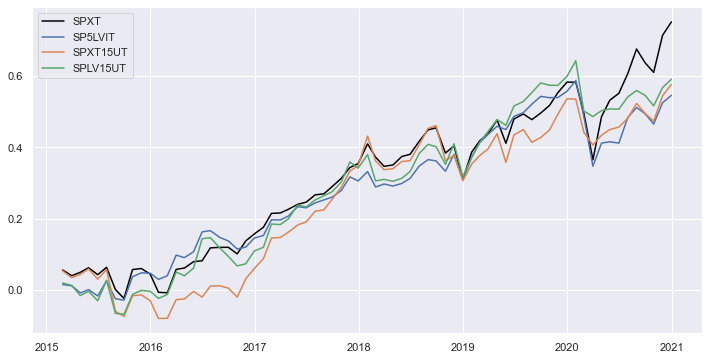

In [22]:
# FROM 2015
plt.figure(figsize=(12, 6))
plt.plot(controlvol_ret["SPXT"].loc["2015-01-31":].cumsum(), "black")
plt.plot(controlvol_ret[["SP5LVIT", "SPXT15UT", "SPLV15UT"]].loc["2015-01-31":].cumsum())
plt.legend(controlvol_ret.columns);

In [23]:
tr2 = traditional_metrics(controlvol_ret, covo)

/Users/AlessioGiust/Desktop/TESI/Codici Tesi/functions_thesis.py:26: RuntimeWarning: invalid value encountered in double_scalars
  IR.append((avg_ret_data[tick] - avg_ret_data[index_tick])/(qq["diff_sp_{}".format(tick)].std()))


In [24]:
spec2 = specific_metrics(controlvol_ret, 0.0, -0.05, -0.1)

# Other Assets to combine with S&P to protect in bear markets
- BARCCTA = managed futures index
- DBVELVIS = long short equity strategies index
- SPVXSTR = index that tracks 1 month VIX futures
- SPVXMTR = index that tracks VIX futures with 5 months average maturity

In [25]:
asset = strategies[["SPXT", "BARCCTA", "DBVELVIS", "SPVXSTR", "SPVXMTR"]]
asset = asset.dropna()
asset_ret = np.log(1+asset.pct_change()).dropna()
asset_ret = asset_ret[3:]
altas = asset[3:]

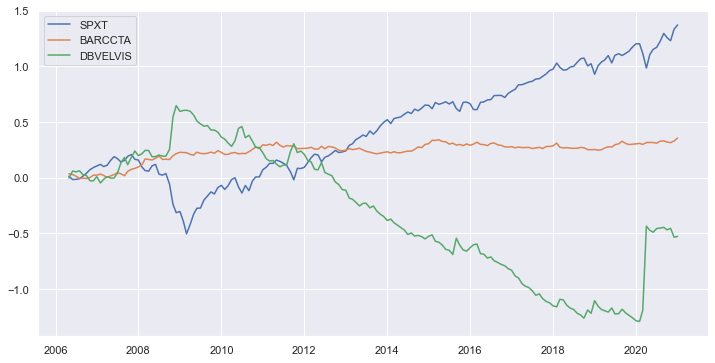

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(asset_ret[["SPXT", "BARCCTA", "DBVELVIS"]].cumsum())
plt.legend(["SPXT", "BARCCTA", "DBVELVIS"]);

In [27]:
# The objective is to reduce avg tail return of the SP (with -5% threshold) from -8.5% to -5% (more than 20% average tail return reduction)
av_tail = avg_tail_return(asset_ret, -0.05)
av_tail  #avg tail -5% threshold

[-0.08378318044335395,
 -0.03976541076589347,
 0.010946512533075884,
 0.08298432731856513,
 0.09751438577698865]

In [28]:
def get_tail_avg(sp, pf):
    """
    Function needed to optimize weight, it computes the average tail return of the index 
    given SP returns below -5%
    Requires array of returns of the SP and the combination index as inputs
     """
    sig = []
    for i in range(len(sp)):
        if (sp[i] <= -0.05) == True:
            sig.append(pf[i])
    avg = np.mean(sig)
    return avg

def optimize_tail_weight(sp, asset, target_avg_tail, eps):
    """
    Function to select ideal weights to create an index that 
    achieves a reduction in the average tail loss of the indexes 
    with respect to the average tail loss of the S&P500 (target avg tail loss of -5%)
    - sp = array of sp returns
    - asset = array of alternative asset returns (same length)
    - target_avg_tail = average tail return target for the index
    - eps = maximum possible distance between the index and the target average tail return
    """
    iteration = 0
    import random
    for i in range(5000):
        w = round(random.uniform(0.1, 0.99), 2)
        pf = (sp*w + asset*(1-w))
        t_avg = get_tail_avg(sp, pf)
        iteration += 1
        if abs(abs(t_avg) - target_avg_tail) <= eps:
            break
    return w, iteration

sp_array = np.array(asset_ret.iloc[:, 0])
barccta_array = np.array(asset_ret.iloc[:, 1])
dbve_array = np.array(asset_ret.iloc[:, 2])
vixfut1_array = np.array(asset_ret.iloc[:, 3])
vixfut5_array = np.array(asset_ret.iloc[:, 4])

w1, b1 = optimize_tail_weight(sp_array, barccta_array, 0.05, 0.0004)
w2, b2 = optimize_tail_weight(sp_array, dbve_array, 0.05, 0.0004)
w3, b3 = optimize_tail_weight(sp_array, vixfut1_array, 0.05, 0.0003)
w4, b4 = optimize_tail_weight(sp_array, vixfut5_array, 0.05, 0.0003)

print(w1, b1)
print(w2, b2)
print(w3, b3)
print(w4, b4)

0.62 10
0.32 30
0.65 13
0.44 116


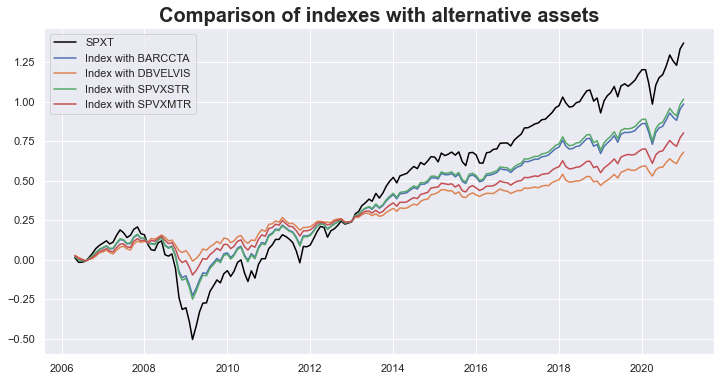

In [29]:
# Combine in a portfolio 
asset_ret["BARCCTA-SPXT"] = (sp_array*w1 + barccta_array*(1-w1))
asset_ret["DBVELVIS-SPXT"] = (sp_array*w2 + barccta_array*(1-w2))
asset_ret["SPVXSTR-SPXT"] = (sp_array*w3 + barccta_array*(1-w3))
asset_ret["SPVXMTR-SPXT"] = (sp_array*w4 + barccta_array*(1-w4))
other = asset_ret[["SPXT", "BARCCTA-SPXT", "DBVELVIS-SPXT", "SPVXSTR-SPXT", "SPVXMTR-SPXT"]]
#other.to_excel("Other.xlsx")

plt.figure(figsize=(12, 6))
plt.plot(asset_ret["SPXT"].cumsum(), "black",label="SPXT")
plt.plot(asset_ret["BARCCTA-SPXT"].cumsum(), label="Index with BARCCTA")
plt.plot(asset_ret["DBVELVIS-SPXT"].cumsum(), label="Index with DBVELVIS")
plt.plot(asset_ret["SPVXSTR-SPXT"].cumsum(), label="Index with SPVXSTR")
plt.plot(asset_ret["SPVXMTR-SPXT"].cumsum(), label="Index with SPVXMTR")
plt.legend()
plt.title("Comparison of indexes with alternative assets", fontsize=20, fontweight="bold");

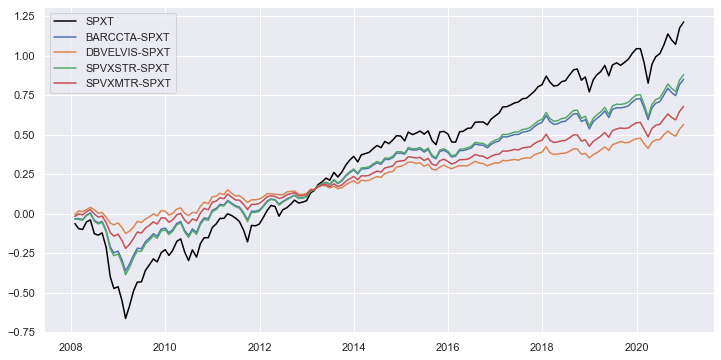

In [30]:
# Different shorter time periods 
# FROM 2008
plt.figure(figsize=(12, 6))
plt.plot(asset_ret["SPXT"].loc["2008-01-31":].cumsum(), "black")
plt.plot(asset_ret[["BARCCTA-SPXT", "DBVELVIS-SPXT", "SPVXSTR-SPXT", "SPVXMTR-SPXT"]].loc["2008-01-31":].cumsum())
plt.legend(["SPXT", "BARCCTA-SPXT", "DBVELVIS-SPXT", "SPVXSTR-SPXT", "SPVXMTR-SPXT"]);

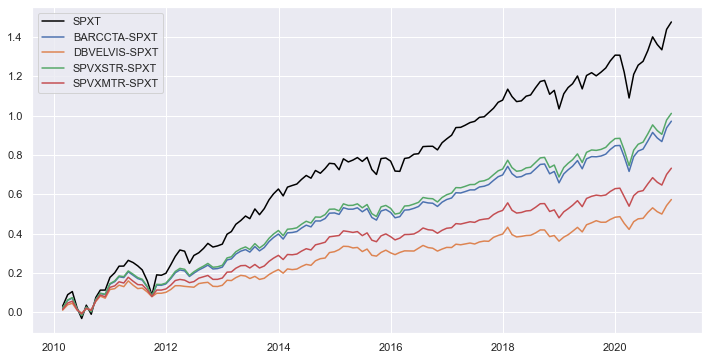

In [31]:
 # FROM 2010
plt.figure(figsize=(12, 6))
plt.plot(asset_ret["SPXT"].loc["2010-01-31":].cumsum(), "black")
plt.plot(asset_ret[["BARCCTA-SPXT", "DBVELVIS-SPXT", "SPVXSTR-SPXT", "SPVXMTR-SPXT"]].loc["2010-01-31":].cumsum())
plt.legend(["SPXT", "BARCCTA-SPXT", "DBVELVIS-SPXT", "SPVXSTR-SPXT", "SPVXMTR-SPXT"]);

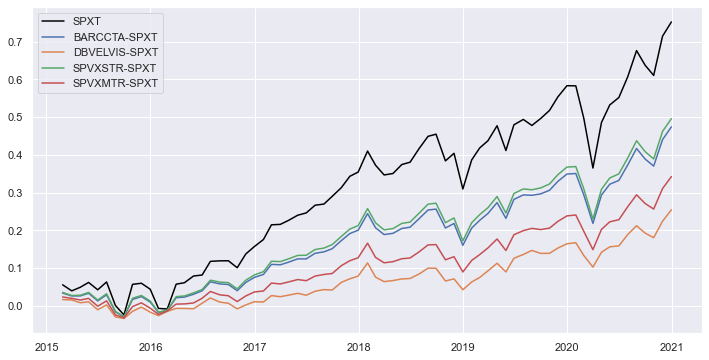

In [32]:
# FROM 2015
plt.figure(figsize=(12, 6))
plt.plot(asset_ret["SPXT"].loc["2015-01-31":].cumsum(), "black")
plt.plot(asset_ret[["BARCCTA-SPXT", "DBVELVIS-SPXT", "SPVXSTR-SPXT", "SPVXMTR-SPXT"]].loc["2015-01-31":].cumsum())
plt.legend(["SPXT", "BARCCTA-SPXT", "DBVELVIS-SPXT", "SPVXSTR-SPXT", "SPVXMTR-SPXT"]);

In [33]:
tr3 = traditional_metrics(asset_ret[["SPXT", "BARCCTA-SPXT", "DBVELVIS-SPXT", "SPVXSTR-SPXT", "SPVXMTR-SPXT"]], asset, no_price=True)

/Users/AlessioGiust/Desktop/TESI/Codici Tesi/functions_thesis.py:26: RuntimeWarning: invalid value encountered in double_scalars
  IR.append((avg_ret_data[tick] - avg_ret_data[index_tick])/(qq["diff_sp_{}".format(tick)].std()))


In [34]:
spec3 = specific_metrics(asset_ret[["SPXT", "BARCCTA-SPXT", "DBVELVIS-SPXT", "SPVXSTR-SPXT", "SPVXMTR-SPXT"]], 0.0, -0.05, -0.1)
spec_check = specific_metrics(asset_ret[["SPXT", "BARCCTA-SPXT", "DBVELVIS-SPXT", "SPVXSTR-SPXT", "SPVXMTR-SPXT"]], 0.0, -0.05, -0.05)
spec_check

,Avg Performance Drag,Bull Drag,Certainty,Avg Tail return
SPXT,0.000000,0.000000,0.0,-0.083783
BARCCTA-SPXT,-0.002179,-0.010613,0.0,-0.067056
DBVELVIS-SPXT,-0.003899,-0.018991,0.0,-0.052677
SPVXSTR-SPXT,-0.002007,-0.009775,0.0,-0.052751
SPVXMTR-SPXT,-0.003211,-0.015640,0.0,-0.049097


# Overall Comparison

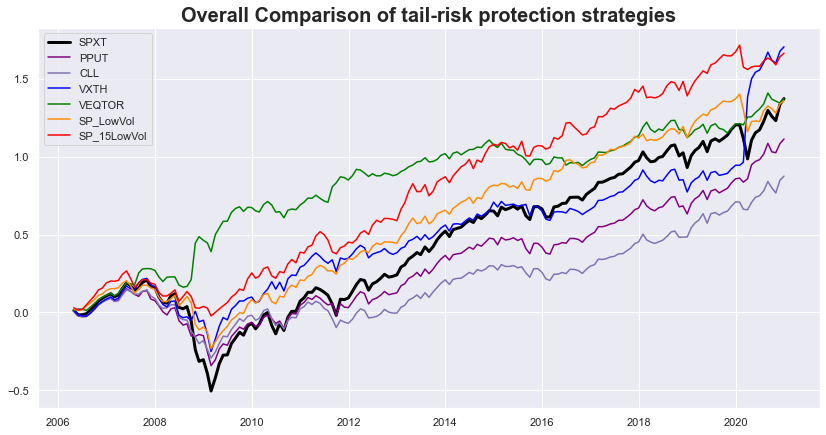

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(strat_ret["SPXT"].cumsum(), "black", label="SPXT", linewidth=3)
plt.plot(strat_ret["PPUT"].cumsum(), "purple", label="PPUT")
plt.plot(strat_ret["CLL"].cumsum(), "m", label="CLL")
plt.plot(strat_ret["VXTH"].cumsum(), "blue", label="VXTH")
plt.plot(strat_ret["SPVQDTR"].cumsum(), "green", label="VEQTOR")
plt.plot(controlvol_ret["SP5LVIT"].cumsum(), "darkorange", label="SP_LowVol")
#plt.plot(controlvol_ret["SPXT15UT"].cumsum(), "", label="SP_15%Vol")
plt.plot(controlvol_ret["SPLV15UT"].cumsum(), "red", label="SP_15LowVol")
plt.title("Overall Comparison of tail-risk protection strategies", fontsize=20, fontweight="bold")
plt.legend();

In [36]:
# Summary table for Traditional and Specific Metrics
summ_trad = tr1.append(tr2.iloc[1:, :], ignore_index=False)
summ_trad = summ_trad.append(tr3.iloc[1:, :], ignore_index=False)
summ_trad

In [37]:
summ_spec = spec1.append(spec2.iloc[1:, :], ignore_index=False)
summ_spec = summ_spec.append(spec3.iloc[1:, :], ignore_index=False)
summ_spec

In [38]:
def calendar_year_comparison(dataframe):
    df = pd.DataFrame(columns=dataframe.columns)
    y1 = dataframe.loc["2006-01-28":"2006-12-31"].sum()
    y2 = dataframe.loc["2007-01-01":"2007-12-31"].sum()
    y3 = dataframe.loc["2008-01-01":"2008-12-31"].sum()
    y4 = dataframe.loc["2009-01-01":"2009-12-31"].sum()
    y5 = dataframe.loc["2010-01-01":"2010-12-31"].sum()
    y6 = dataframe.loc["2011-01-01":"2011-12-31"].sum()
    y7 = dataframe.loc["2012-01-01":"2012-12-31"].sum()
    y8 = dataframe.loc["2013-01-01":"2013-12-31"].sum()
    y9 = dataframe.loc["2014-01-01":"2014-12-31"].sum()
    y10 = dataframe.loc["2015-01-01":"2015-12-31"].sum()
    y11 = dataframe.loc["2016-01-01":"2016-12-31"].sum()
    y12 = dataframe.loc["2017-01-01":"2017-12-31"].sum()
    y13 = dataframe.loc["2018-01-01":"2018-12-31"].sum()
    y14 = dataframe.loc["2019-01-01":"2019-12-31"].sum()
    y15 = dataframe.loc["2020-01-01":"2020-12-31"].sum()
    df.loc["2006"] = y1
    df.loc["2007"] = y2
    df.loc["2008"] = y3
    df.loc["2009"] = y4
    df.loc["2010"] = y5
    df.loc["2011"] = y6
    df.loc["2012"] = y7
    df.loc["2013"] = y8
    df.loc["2014"] = y9
    df.loc["2015"] = y10
    df.loc["2016"] = y11
    df.loc["2017"] = y12
    df.loc["2018"] = y13
    df.loc["2019"] = y14
    df.loc["2020"] = y15
    
    return df

cal_strat = calendar_year_comparison(strat_ret)

In [39]:
cal_strat1 = calendar_year_comparison(controlvol_ret).drop(columns="SPXT")

In [40]:
cal_strat2 = calendar_year_comparison(asset_ret[["BARCCTA-SPXT", "DBVELVIS-SPXT", "SPVXSTR-SPXT", "SPVXMTR-SPXT"]])

In [41]:
cal_year_comp = cal_strat.merge(cal_strat1, left_index=True, right_index=True)
cal_year_comp = cal_year_comp.merge(cal_strat2, left_index=True, right_index=True)
cal_year_comp

,SPXT,PPUT,CLL,CLLZ,VXTH,SPVQDTR,LOVOL,SP5LVIT,SPXT15UT,SPLV15UT,BARCCTA-SPXT,DBVELVIS-SPXT,SPVXSTR-SPXT,SPVXMTR-SPXT
2006,0.105430,0.080628,0.080571,0.091850,0.085352,0.110957,0.088721,0.141989,0.129943,0.189024,0.074275,0.049678,0.076734,0.059517
2007,0.053481,-0.004821,0.009077,0.043492,0.079824,0.158688,0.073512,0.005828,0.049006,-0.008360,0.061137,0.067181,0.060533,0.064764
2008,-0.461998,-0.224504,-0.269784,-0.380999,-0.214891,0.193007,-0.253983,-0.240903,-0.210435,-0.141918,-0.236362,-0.058228,-0.254175,-0.129481
2009,0.234789,0.083526,0.162507,0.220465,0.148565,0.210200,0.183675,0.175802,0.158738,0.215128,0.145188,0.074451,0.152262,0.102746
2010,0.140313,0.110731,0.040421,0.065288,0.191429,0.016330,0.140135,0.125390,0.135417,0.132521,0.112875,0.091214,0.115041,0.099878
2011,0.020898,-0.014469,-0.092558,0.030519,0.057557,0.160461,0.057198,0.137833,-0.034925,0.064533,0.001044,-0.014631,0.002611,-0.008361
2012,0.148448,0.095298,0.065713,0.104955,0.035452,0.034758,0.041947,0.098047,0.100054,0.138263,0.085527,0.035853,0.090495,0.055723
2013,0.280570,0.239491,0.213284,0.151976,0.177527,0.133710,0.159399,0.211781,0.331516,0.281297,0.168528,0.080073,0.177373,0.115455
2014,0.128291,0.105774,0.088340,0.041114,0.146876,0.056126,0.109859,0.161151,0.107225,0.208665,0.107422,0.090947,0.109070,0.097537
2015,0.013743,-0.052743,-0.040603,0.019927,-0.056929,-0.094441,-0.013557,0.042462,-0.060738,-0.011487,0.002793,-0.005852,0.003657,-0.002394


## Comparison of specific crisis periods

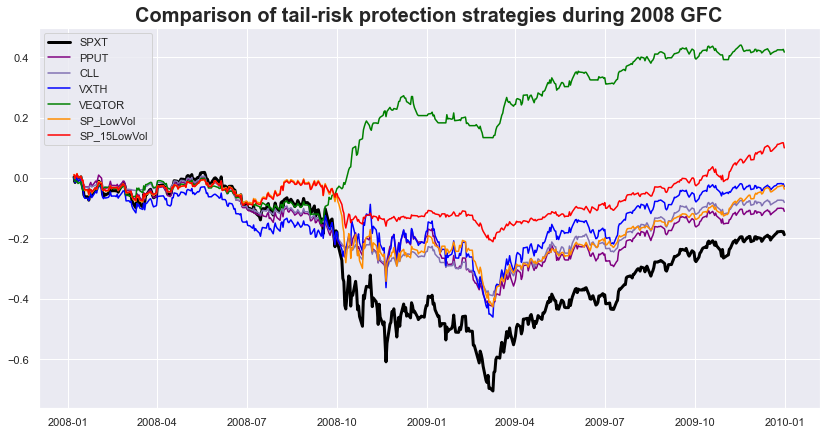

In [42]:
# ADD PORTFOLIO CREATED BY ME
cvol = strategies_daily[["SPXT", "SP5LVIT", "SPXT15UT", "SPLV15UT"]] 
cvol = cvol.dropna()
cvol_ret = np.log(1+cvol.pct_change()).dropna()
cvol_ret = cvol_ret[86:]
co = cvol[86:]

# 2008-2009 crisis
plt.figure(figsize=(14, 7))
plt.plot(strat_daily_ret["SPXT"].loc["2008-01-07":"2009-12-31"].cumsum(), "black", label="SPXT", linewidth=3)
plt.plot(strat_daily_ret["PPUT"].loc["2008-01-07":"2009-12-31"].cumsum(), "purple", label="PPUT")
plt.plot(strat_daily_ret["CLL"].loc["2008-01-07":"2009-12-31"].cumsum(), "m", label="CLL")
plt.plot(strat_daily_ret["VXTH"].loc["2008-01-07":"2009-12-31"].cumsum(), "blue", label="VXTH")
plt.plot(strat_daily_ret["SPVQDTR"].loc["2008-01-07":"2009-12-31"].cumsum(), "green", label="VEQTOR")
plt.plot(cvol_ret["SP5LVIT"].loc["2008-01-07":"2009-12-31"].cumsum(), "darkorange", label="SP_LowVol")
#plt.plot(controlvol_ret["SPXT15UT"].cumsum(), "", label="SP_15%Vol")
plt.plot(cvol_ret["SPLV15UT"].loc["2008-01-07":"2009-12-31"].cumsum(), "red", label="SP_15LowVol")
plt.title("Comparison of tail-risk protection strategies during 2008 GFC", fontsize=20, fontweight="bold")
plt.legend();

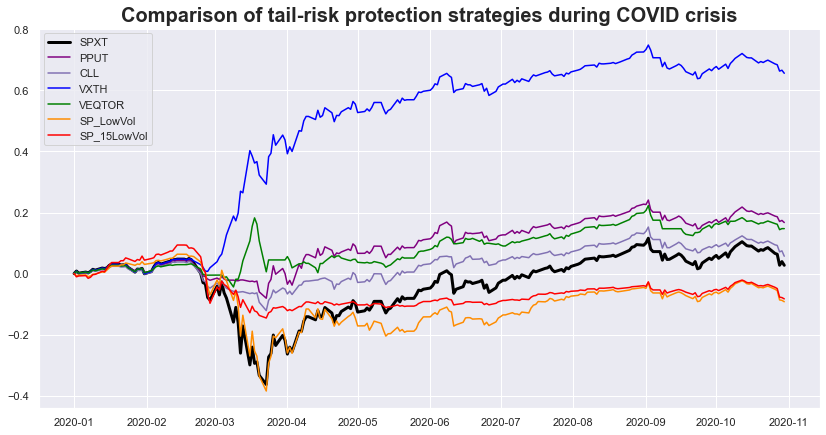

In [43]:
# 2020 crisis
# ADD PORTFOLIO CREATED BY ME
plt.figure(figsize=(14, 7))
plt.plot(strat_daily_ret["SPXT"].loc["2020-01-01":"2020-10-31"].cumsum(), "black", label="SPXT", linewidth=3)
plt.plot(strat_daily_ret["PPUT"].loc["2020-01-01":"2020-10-31"].cumsum(), "purple", label="PPUT")
plt.plot(strat_daily_ret["CLL"].loc["2020-01-01":"2020-10-31"].cumsum(), "m", label="CLL")
plt.plot(strat_daily_ret["VXTH"].loc["2020-01-01":"2020-10-31"].cumsum(), "blue", label="VXTH")
plt.plot(strat_daily_ret["SPVQDTR"].loc["2020-01-01":"2020-10-31"].cumsum(), "green", label="VEQTOR")
plt.plot(cvol_ret["SP5LVIT"].loc["2020-01-01":"2020-10-31"].cumsum(), "darkorange", label="SP_LowVol")
#plt.plot(controlvol_ret["SPXT15UT"].cumsum(), "", label="SP_15%Vol")
plt.plot(cvol_ret["SPLV15UT"].loc["2020-01-01":"2020-10-31"].cumsum(), "red", label="SP_15LowVol")
plt.title("Comparison of tail-risk protection strategies during COVID crisis", fontsize=20, fontweight="bold")
plt.legend();